In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_times(filename):
    sizes = [10, 20, 50, 100, 200, 300, 400, 500]
    data = {size: {'serial': [], '1_thread': [], '12_threads': []} for size in sizes}
    
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    current_size = None
    current_mode = None
    for line in lines:
        size_match = re.search(r'Size: (\d+) x \d+', line)
        if size_match:
            current_size = int(size_match.group(1))
        
        if 'Serial run' in line:
            current_mode = 'serial'
        elif 'Parallel run with 1 threads' in line:
            current_mode = '1_thread'
        elif 'Parallel run with 12 threads' in line:
            current_mode = '12_threads'
        
        time_match = re.search(r'Time: (\d+):(\d+\.\d+)', line)
        if time_match:
            minutes = int(time_match.group(1))
            seconds = float(time_match.group(2))
            total_seconds = 60 * minutes + seconds
            data[current_size][current_mode].append(total_seconds)
    
    return data

def compute_averages(data):
    averages = {size: {} for size in data}
    for size, modes in data.items():
        for mode, times in modes.items():
            averages[size][mode] = np.mean(times)
    return averages

def compute_speedup_efficiency(averages):
    speedup = {size: {} for size in averages}
    efficiency = {size: {} for size in averages}
    
    for size in averages:
        T_s = averages[size]['serial']
        speedup[size]['1_thread'] = T_s / averages[size]['1_thread']
        speedup[size]['12_threads'] = T_s / averages[size]['12_threads']
        efficiency[size]['1_thread'] = speedup[size]['1_thread'] / 1
        efficiency[size]['12_threads'] = speedup[size]['12_threads'] / 12
        
    return speedup, efficiency

def plot_data(averages, speedup, efficiency):
    sizes = list(averages.keys())
    serial_times = [averages[size]['serial'] for size in sizes]
    one_thread_times = [averages[size]['1_thread'] for size in sizes]
    twelve_thread_times = [averages[size]['12_threads'] for size in sizes]
    
    # Plotting execution times
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 3, 1)
    plt.plot(sizes, serial_times, label='Serial', marker='o')
    plt.plot(sizes, one_thread_times, label='1 Thread', marker='o')
    plt.plot(sizes, twelve_thread_times, label='12 Threads', marker='o')
    plt.xlabel('Size (NxN)')
    plt.ylabel('Average Time (seconds)')
    plt.title('Average Execution Time')
    plt.legend()
    plt.grid(True)
    
    # Plotting Speedup
    plt.subplot(1, 3, 2)
    plt.plot(sizes, [speedup[size]['1_thread'] for size in sizes], label='1 Thread', marker='o')
    plt.plot(sizes, [speedup[size]['12_threads'] for size in sizes], label='12 Threads', marker='o')
    plt.xlabel('Size (NxN)')
    plt.ylabel('Speedup')
    plt.title('Speedup over Serial Execution')
    plt.legend()
    plt.grid(True)
    
    # Plotting Efficiency
    plt.subplot(1, 3, 3)
    plt.plot(sizes, [efficiency[size]['1_thread'] for size in sizes], label='1 Thread', marker='o')
    plt.plot(sizes, [efficiency[size]['12_threads'] for size in sizes], label='12 Threads', marker='o')
    plt.xlabel('Size (NxN)')
    plt.ylabel('Efficiency')
    plt.title('Parallel Efficiency')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

/var/folders/99/lqq2r8_x1rg91yql_hntx8nr0000gn/T/ipykernel_93001/3590251522.py:44: RuntimeWarning: divide by zero encountered in scalar divide
  speedup[size]['1_thread'] = T_s / averages[size]['1_thread']
/var/folders/99/lqq2r8_x1rg91yql_hntx8nr0000gn/T/ipykernel_93001/3590251522.py:45: RuntimeWarning: divide by zero encountered in scalar divide
  speedup[size]['12_threads'] = T_s / averages[size]['12_threads']
/var/folders/99/lqq2r8_x1rg91yql_hntx8nr0000gn/T/ipykernel_93001/3590251522.py:44: RuntimeWarning: invalid value encountered in scalar divide
  speedup[size]['1_thread'] = T_s / averages[size]['1_thread']
/var/folders/99/lqq2r8_x1rg91yql_hntx8nr0000gn/T/ipykernel_93001/3590251522.py:45: RuntimeWarning: invalid value encountered in scalar divide
  speedup[size]['12_threads'] = T_s / averages[size]['12_threads']


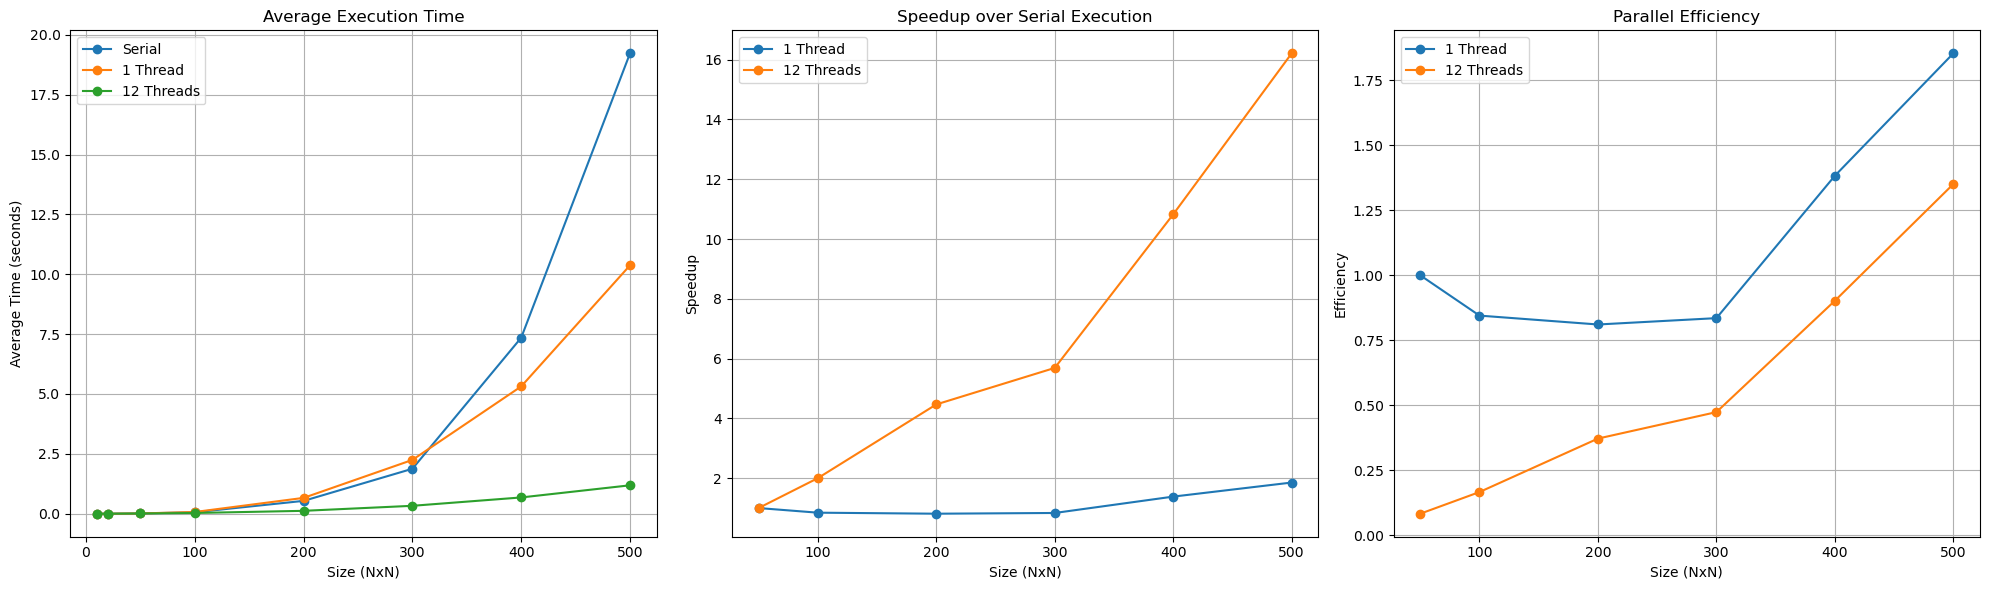

In [3]:
# Usage
data = read_times('heat_stencil_benchmark_102809.out')
averages = compute_averages(data)
speedup, efficiency = compute_speedup_efficiency(averages)
plot_data(averages, speedup, efficiency)